<a href="https://colab.research.google.com/github/parasitis/SPPML/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.metrics import accuracy_score

In [ ]:
INFOSYS=pd.read_csv("/content/INFY.NS.csv")
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [ ]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [ ]:
INFOSYS.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1223,False,False,False,False,False,False,False
1224,False,False,False,False,False,False,False
1225,False,False,False,False,False,False,False
1226,False,False,False,False,False,False,False


In [ ]:
INFOSYS.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
INFOSYS.isnull().sum().sum()

6

In [ ]:
INFOSYS.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
INFOSYS_NEW=INFOSYS.dropna(axis = 0)
INFOSYS_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
...,...,...,...,...,...,...,...
1223,2020-06-23,695.700012,724.500000,692.099976,720.650024,720.650024,12157390.0
1224,2020-06-24,716.900024,726.799988,709.400024,714.150024,714.150024,10220838.0
1225,2020-06-25,704.849976,705.599976,693.500000,700.500000,700.500000,14945284.0
1226,2020-06-26,710.200012,751.599976,710.000000,748.200012,748.200012,26030458.0


In [ ]:
INFOSYS_NEW.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
INFOSYS_NEW.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [ ]:
INFOSYS_NEW['Date']=pd.to_datetime(INFOSYS_NEW['Date'])

In [ ]:
print(f'DataFrame contains Stock Prices between {INFOSYS_NEW.Date.min()} {INFOSYS_NEW.Date.max()}')
print(f'Total Days = {(INFOSYS_NEW.Date.max()- INFOSYS_NEW.Date.min()).days} days')

DataFrame contains Stock Prices between 2015-07-01 00:00:00 2020-06-29 00:00:00
Total Days = 1825 days


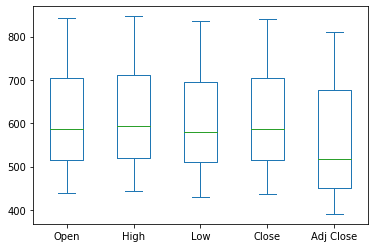

In [ ]:
INFOSYS_NEW[['Open','High','Low','Close','Adj Close']].plot(kind='box')

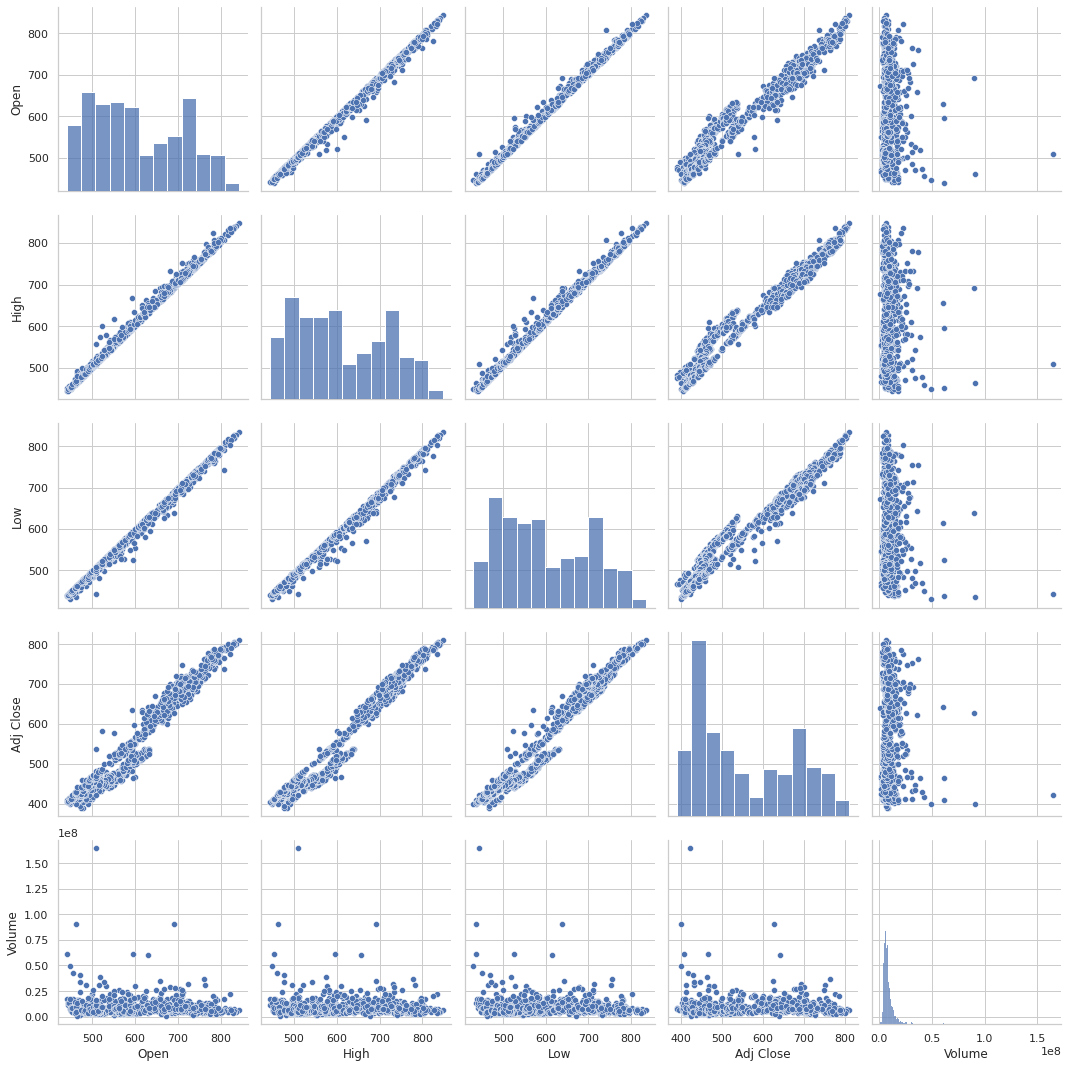

In [ ]:
sns.set(style='whitegrid',context='notebook')
cols=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
sns.pairplot(INFOSYS_NEW[cols],size=3)
plt.tight_layout()
plt.show()

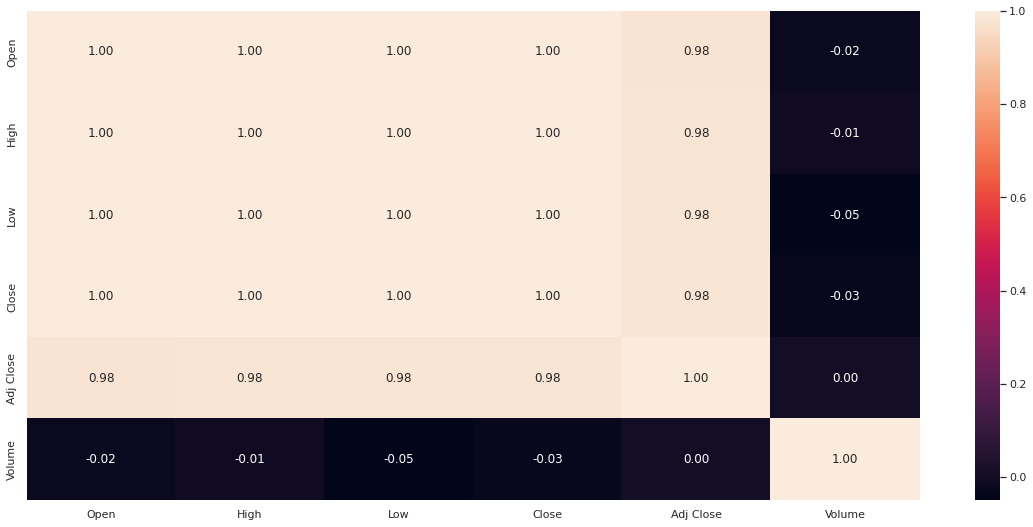

In [ ]:
import seaborn as sns
corr = INFOSYS_NEW.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X= np.array(INFOSYS_NEW.index).reshape(-1,1)
Y= INFOSYS_NEW['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [ ]:
scaler = StandardScaler().fit(X_train)

# ***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

LinearRegression()

In [ ]:
predicted=model_LR.predict(X_test)

In [ ]:
print(f'Accucary of INFOSYS STOCK MARKETING using Linear Regression is', model_LR.score(X_test, Y_test))

Accucary of INFOSYS STOCK MARKETING using Linear Regression is 0.5070011432015731


## **Accucary of INFOSYS STOCK MARKETING using Linear Regression: 50.7%**

# ***Logistic Regression***

In [ ]:
INFOSYS_NEW['Open-Close']= INFOSYS_NEW.Close - INFOSYS_NEW.Open
INFOSYS_NEW['High-Low']  = INFOSYS_NEW.High - INFOSYS_NEW.Low
INFOSYS_NEW = INFOSYS_NEW.dropna()
X= INFOSYS_NEW[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [ ]:
Y= np.where(INFOSYS_NEW['Close'].shift(-1)>INFOSYS_NEW['Close'],1,-1)

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
model_LOR = LogisticRegression()
model_LOR = model_LOR.fit (X_train,Y_train)
pd.DataFrame(zip(X.columns, np.transpose(model_LOR.coef_)))

,0,1
0,Open-Close,[-0.008348863651675071]
1,High-Low,[-0.00802955068639213]


In [ ]:
predicted = model_LOR.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.53      0.46      0.49       115
           1       0.57      0.64      0.60       130

    accuracy                           0.56       245
   macro avg       0.55      0.55      0.55       245
weighted avg       0.55      0.56      0.55       245



In [ ]:
print('Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression ',model_LOR.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression  0.5551020408163265


## **Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression: 55.51%**

# ***Support Vector Machine***

In [ ]:
INFOSYS = INFOSYS.dropna()
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [ ]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [ ]:
Y= np.where(INFOSYS['Adj Close'].shift(-1)>INFOSYS['Adj Close'],1,-1)

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
%pylab inline
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import svm

model_SVM = svm.SVC(kernel ='linear',C=1.00)
model_SVM.fit(X_train, Y_train)
print(model_SVM)

accuracy_train = accuracy_score(Y_train, model_SVM.predict(X_train))
accuracy_test = accuracy_score(Y_test, model_SVM.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Populating the interactive namespace from numpy and matplotlib
SVC(kernel='linear')
Train_data Accuracy: 0.52
Test_data Accuracy: 0.52


In [ ]:
predicted = model_SVM.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.47      0.16      0.23       116
           1       0.53      0.85      0.65       130

    accuracy                           0.52       246
   macro avg       0.50      0.50      0.44       246
weighted avg       0.50      0.52      0.45       246



In [ ]:
print('Accuracy of Infosys_Stock_Market_Price_Prediction using SVM ',model_SVM.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using SVM  0.5203252032520326


## **Accuracy of Infosys_Stock_Market_Price_Prediction using SVM: 52.03%**

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline
%matplotlib inline

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train)
print(model_DT)

accuracy_train = accuracy_score(Y_train, model_DT.predict(X_train))
accuracy_test = accuracy_score(Y_test, model_DT.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Populating the interactive namespace from numpy and matplotlib
DecisionTreeClassifier()
Train_data Accuracy: 1.00
Test_data Accuracy: 0.54


In [ ]:
predicted = model_DT.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.51      0.57      0.54       116
           1       0.57      0.51      0.54       130

    accuracy                           0.54       246
   macro avg       0.54      0.54      0.54       246
weighted avg       0.54      0.54      0.54       246



In [ ]:
print('Accuracy of Infosys_Stock_Market_Price_Prediction using Decision Tree Classifier ',model_DT.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using Decision Tree Classifier  0.5365853658536586


## **Accuracy of Infosys_Stock_Market_Price_Prediction using Decision Tree Classifier: 54.06%**

# ***K-NEAREST NEIGHBORS***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=15)

model_knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, model_knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, model_knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.62
Test_data Accuracy: 0.48


In [ ]:
model_knn = model_knn.fit (X_train,Y_train)

In [ ]:
predicted = model_knn.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.45      0.45      0.45       116
           1       0.51      0.52      0.51       130

    accuracy                           0.48       246
   macro avg       0.48      0.48      0.48       246
weighted avg       0.48      0.48      0.48       246



In [ ]:
print('Accuracy of Infosys_Stock_Market_Price_Prediction using K-Nearest Neighbors ', model_knn.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using K-Nearest Neighbors  0.483739837398374


## **Accuracy of Infosys_Stock_Market_Price_Prediction using K-Nearest Neighbors: 48.37%**

# ***Random Forest Classifier***

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv=10))

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=16)

In [ ]:
model_rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [ ]:
rfc_pred = model_rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.44      0.48      0.46       116
           1       0.50      0.45      0.47       130

    accuracy                           0.47       246
   macro avg       0.47      0.47      0.47       246
weighted avg       0.47      0.47      0.47       246



In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of Infosys_Stock_Market_Price_Prediction using Random_Forest_Classifier ', model_rfc.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using Random_Forest_Classifier  0.46747967479674796


## **Accuracy of Infosys_Stock_Market_Price_Prediction using Random_Forest_Classifier: 46.75%**